<a href="https://colab.research.google.com/github/yamini-mallula/2022Bstudentlist/blob/main/Predictive_Maintance_System_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Importing Dataset

In [9]:
data=pd.read_csv("predictive_maintenance.csv")

In [ ]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [10]:
data.shape

(10000, 10)

In [11]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [12]:
data.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [14]:
data.isna().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


In [15]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [16]:
data['Target'].value_counts()

,count
Target,
0,9661
1,339


In [17]:
data['Failure Type'].value_counts()

,count
Failure Type,
No Failure,9652
Heat Dissipation Failure,112
Power Failure,95
Overstrain Failure,78
Tool Wear Failure,45
Random Failures,18


In [18]:
data.groupby(['Type']).count()

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
Type,,,,,,,,,
H,1003,1003,1003,1003,1003,1003,1003,1003,1003
L,6000,6000,6000,6000,6000,6000,6000,6000,6000
M,2997,2997,2997,2997,2997,2997,2997,2997,2997


In [19]:
data.groupby(['Failure Type']).count()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
Failure Type,,,,,,,,,
Heat Dissipation Failure,112,112,112,112,112,112,112,112,112
No Failure,9652,9652,9652,9652,9652,9652,9652,9652,9652
Overstrain Failure,78,78,78,78,78,78,78,78,78
Power Failure,95,95,95,95,95,95,95,95,95
Random Failures,18,18,18,18,18,18,18,18,18
Tool Wear Failure,45,45,45,45,45,45,45,45,45


In [20]:
data.groupby(['Target']).count()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
Target,,,,,,,,,
0,9661,9661,9661,9661,9661,9661,9661,9661,9661
1,339,339,339,339,339,339,339,339,339


In [21]:
data['Process temperature [K]'].mean()

310.00556

In [22]:
data['Process temperature [K]'].median()

310.1

In [23]:
data['Process temperature [K]'].mode()

,Process temperature [K]
0,310.6


In [24]:
data1=data.drop(['UDI','Product ID'],axis=1)

In [25]:
data1.shape

(10000, 8)

In [26]:
data2=pd.get_dummies(data1,dtype=int)
data2

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_H,Type_L,Type_M,Failure Type_Heat Dissipation Failure,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure
0,298.1,308.6,1551,42.8,0,0,0,0,1,0,1,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,0,1,0,0,1,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,0,1,0,0,1,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,0,1,0,0,1,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,0,1,0,1,0,0,0,0
9996,298.9,308.4,1632,31.8,17,0,1,0,0,0,1,0,0,0,0
9997,299.0,308.6,1645,33.4,22,0,0,0,1,0,1,0,0,0,0
9998,299.0,308.7,1408,48.5,25,0,1,0,0,0,1,0,0,0,0


In [27]:
data2.shape

(10000, 15)

In [28]:
y=data2['Target']
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [ ]:
#y.values()

In [ ]:
X=data2.drop(['Target'],axis=1)
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M,Failure Type_Heat Dissipation Failure,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure
0,298.1,308.6,1551,42.8,0,0,0,1,0,1,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,1,0,0,1,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,1,0,0,1,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,1,0,0,1,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1,0,1,0,0,0,0
9996,298.9,308.4,1632,31.8,17,1,0,0,0,1,0,0,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1,0,1,0,0,0,0
9998,299.0,308.7,1408,48.5,25,1,0,0,0,1,0,0,0,0


# Data Visualization

Correlation Matrix

In [ ]:
corr=data2.corr()
corr

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_H,Type_L,Type_M,Failure Type_Heat Dissipation Failure,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,-0.023025,0.006676,0.007958,0.136372,-0.084453,-0.006072,0.003470,0.016172,0.009545
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,-0.017967,0.005564,0.005831,0.056924,-0.039816,0.002732,-0.003355,0.021466,0.007200
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,-0.001171,0.004735,-0.004296,-0.119213,0.045483,-0.091264,0.123018,-0.011685,0.011960
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,-0.004978,0.001191,0.001991,0.136570,-0.191563,0.150239,0.083781,0.015060,-0.018617
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,-0.002787,0.008232,-0.006976,-0.001023,-0.105251,0.139669,-0.009334,0.007964,0.114717
Target,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,-0.023916,0.035643,-0.022432,0.568154,-0.959389,0.473324,0.522812,-0.007955,0.358919
Type_H,-0.023025,-0.017967,-0.001171,-0.004978,-0.002787,-0.023916,1.000000,-0.408928,-0.218425,-0.010229,0.019806,-0.025820,-0.015541,0.017235,0.007393
Type_L,0.006676,0.005564,0.004735,0.001191,0.008232,0.035643,-0.408928,1.000000,-0.801211,0.013190,-0.038091,0.060792,0.004209,0.005779,-0.006100
Type_M,0.007958,0.005831,-0.004296,0.001991,-0.006976,-0.022432,-0.218425,-0.801211,1.000000,-0.007397,0.027745,-0.048078,0.005690,-0.017481,0.001675
Failure Type_Heat Dissipation Failure,0.136372,0.056924,-0.119213,0.136570,-0.001023,0.568154,-0.010229,0.013190,-0.007397,1.000000,-0.560498,-0.009436,-0.010423,-0.004519,-0.007156


Heat Map

<Axes: >

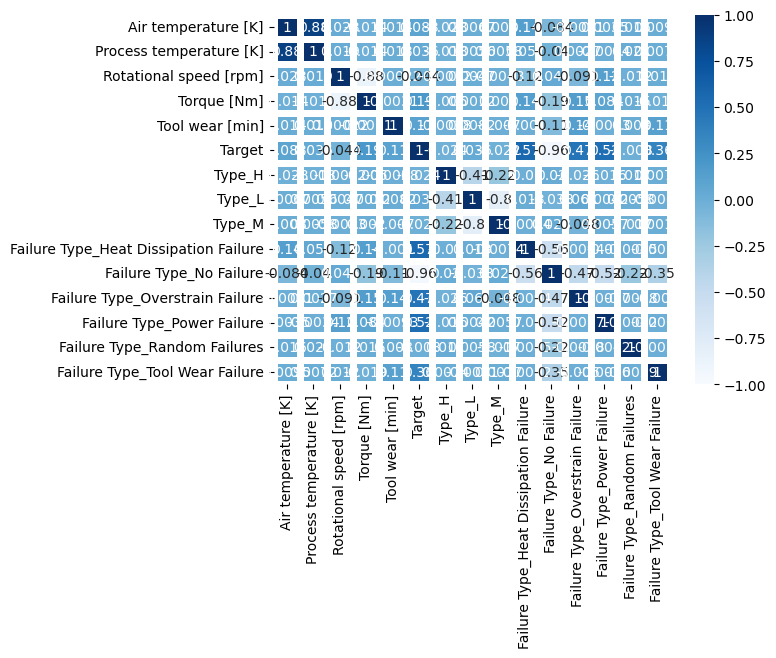

In [ ]:
import seaborn as sns
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, linewidth=5, cmap='Blues')

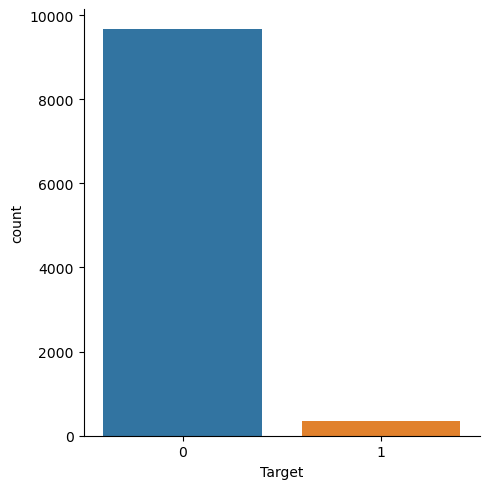

In [ ]:
sns.catplot(x="Target",data=data2,kind="count")#for creating categorical plot

(array([ 153.,  400., 1394., 1620., 1144., 1894., 1179., 1203.,  552.,
         461.]),
 array([295.3 , 296.22, 297.14, 298.06, 298.98, 299.9 , 300.82, 301.74,
        302.66, 303.58, 304.5 ]),
 <BarContainer object of 10 artists>)

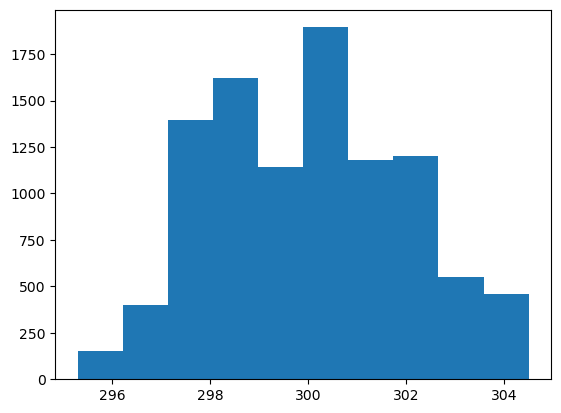

In [ ]:
plt.hist(data1['Air temperature [K]'])

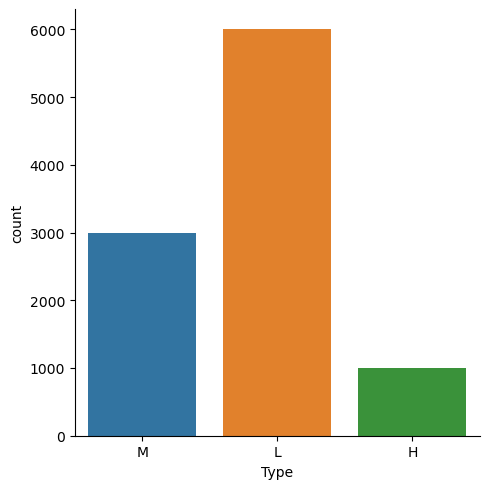

In [ ]:
sns.catplot(x="Type",data=data,kind="count")

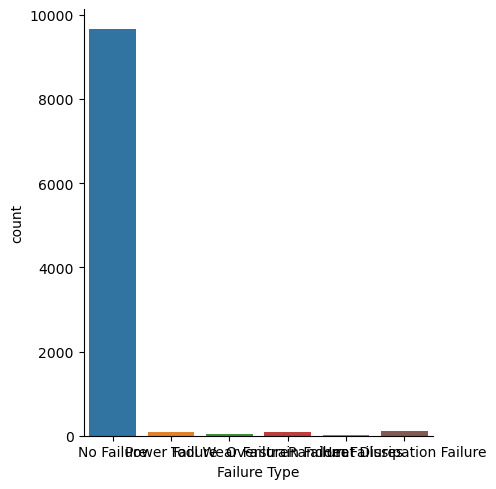

In [ ]:
sns.catplot(x="Failure Type",data=data,kind="count")

array([[<Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>,
        <Axes: title={'center': 'Rotational speed [rpm]'}>],
       [<Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>,
        <Axes: title={'center': 'Target'}>],
       [<Axes: title={'center': 'Type_H'}>,
        <Axes: title={'center': 'Type_L'}>,
        <Axes: title={'center': 'Type_M'}>],
       [<Axes: title={'center': 'Failure Type_Heat Dissipation Failure'}>,
        <Axes: title={'center': 'Failure Type_No Failure'}>,
        <Axes: title={'center': 'Failure Type_Overstrain Failure'}>],
       [<Axes: title={'center': 'Failure Type_Power Failure'}>,
        <Axes: title={'center': 'Failure Type_Random Failures'}>,
        <Axes: title={'center': 'Failure Type_Tool Wear Failure'}>],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <

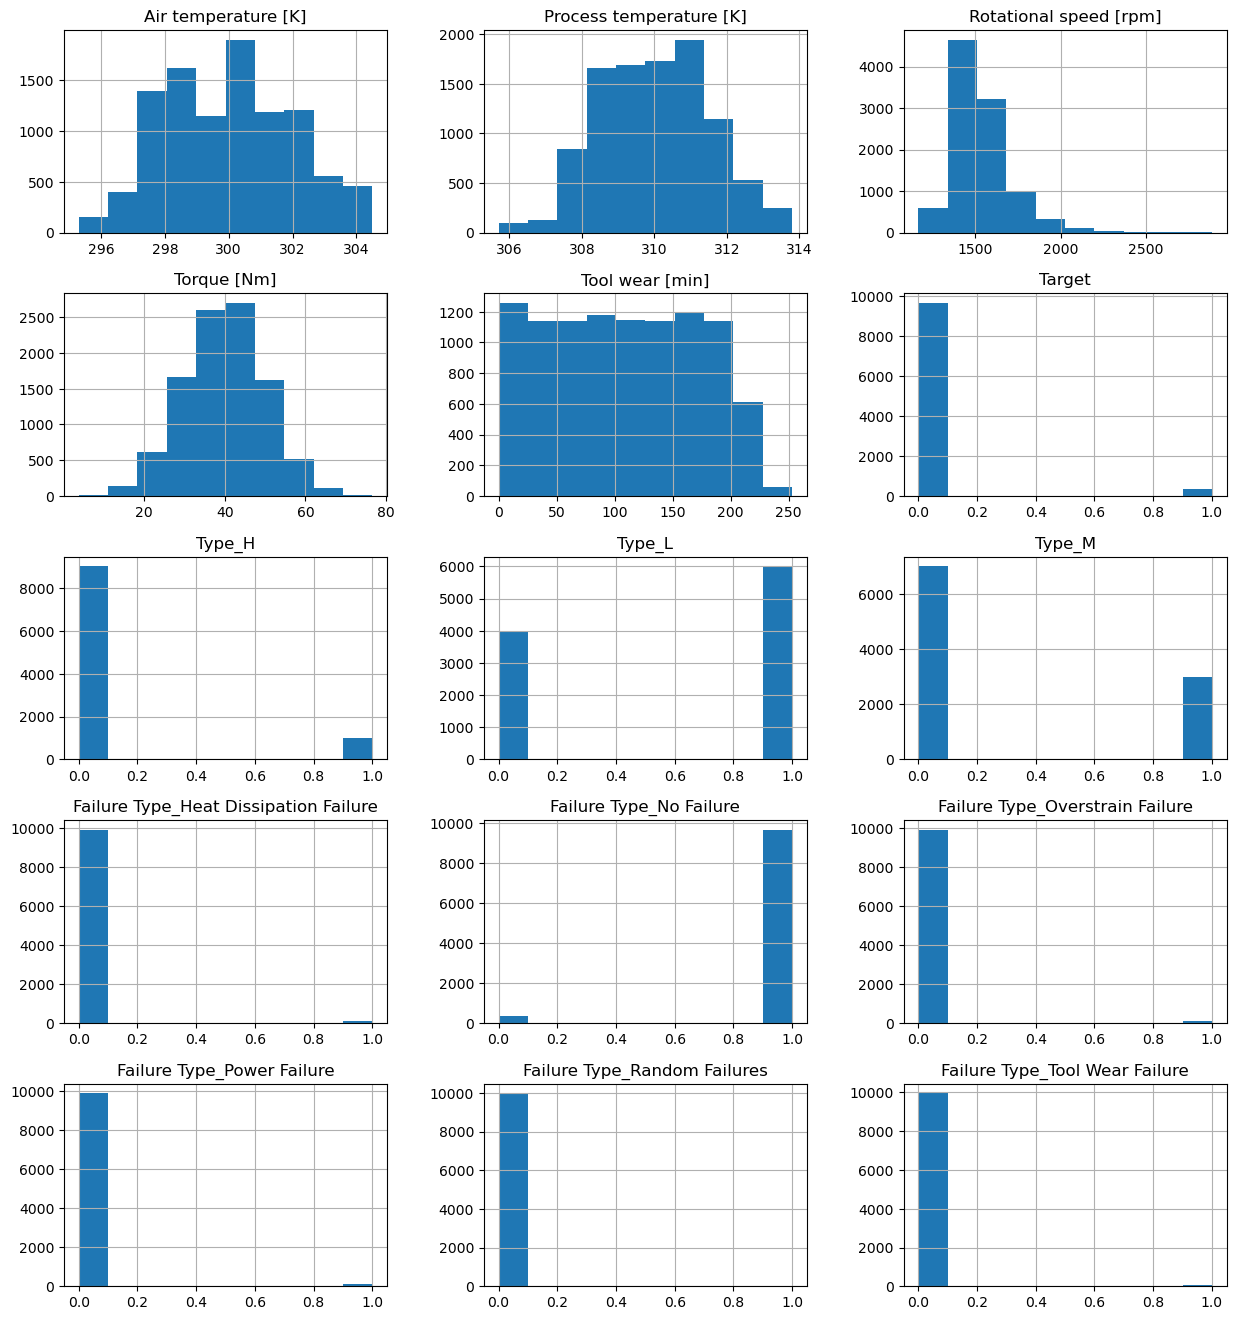

In [ ]:
data2.hist(figsize=(15,30),layout=(9,3))

<Axes: xlabel='Rotational speed [rpm]', ylabel='Density'>

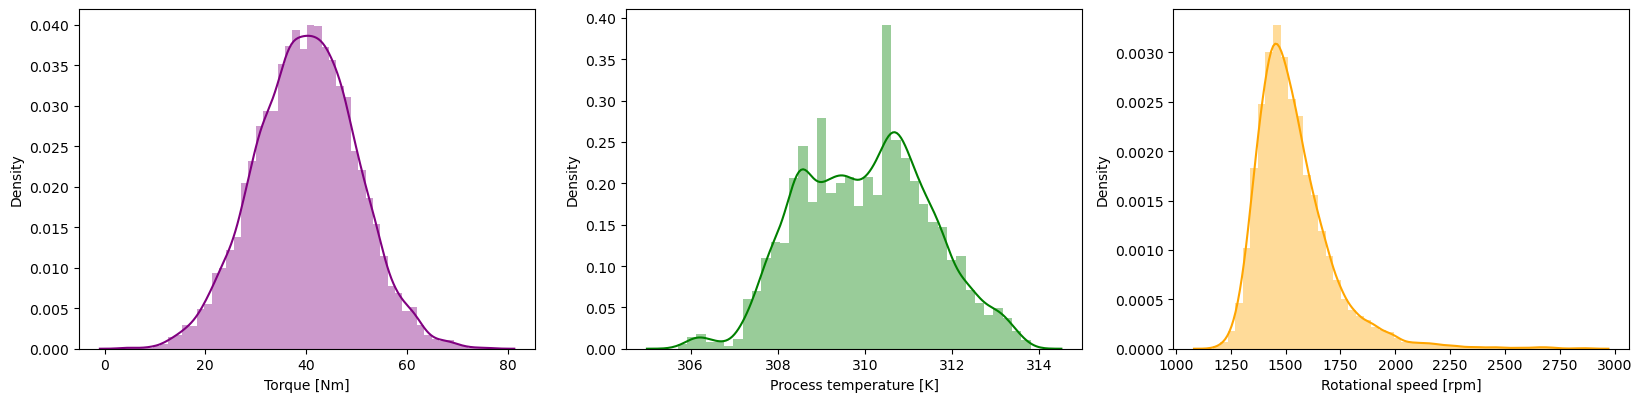

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.distplot(data['Torque [Nm]'],color='purple')

plt.subplot(3,3,2)
sns.distplot(data['Process temperature [K]'],color='green')

plt.subplot(3,3,3)
sns.distplot(data['Rotational speed [rpm]'],color='orange')

# Splitting data into Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=24,test_size=0.30)

In [ ]:
X_train

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M,Failure Type_Heat Dissipation Failure,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Random Failures,Failure Type_Tool Wear Failure
3305,301.3,310.4,1577,48.3,78,0,0,1,0,1,0,0,0,0
8033,300.7,311.9,1485,38.8,9,0,1,0,0,1,0,0,0,0
6318,300.9,310.3,1416,50.9,152,0,0,1,0,1,0,0,0,0
7476,300.2,311.5,1492,41.8,128,0,1,0,0,1,0,0,0,0
3486,301.9,310.8,1650,29.8,94,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6500,300.9,310.0,1416,46.6,201,0,0,1,0,1,0,0,0,0
5249,303.4,312.9,1422,39.9,63,0,0,1,0,1,0,0,0,0
3473,301.8,310.8,1691,33.4,62,0,0,1,0,1,0,0,0,0
8535,298.6,309.5,1547,44.8,36,0,1,0,0,1,0,0,0,0


In [ ]:
X_test.shape

(3000, 14)

In [ ]:
y_train

3305    0
8033    0
6318    0
7476    0
3486    0
       ..
6500    0
5249    0
3473    0
8535    0
899     0
Name: Target, Length: 7000, dtype: int64

In [ ]:
y_test

5821    0
2516    0
4282    1
4173    1
255     0
       ..
8151    0
4685    0
3609    0
5835    0
339     0
Name: Target, Length: 3000, dtype: int64

In [29]:
#X_test.to_csv("vinay_Xtest.csv",encoding='utf-8', index=False,header=False)
#y_test.to_csv("vinay_ytest.csv",encoding='utf-8', index=False,header=False)

In [ ]:
#new_Xtest=pd.read_csv("vinay_Xtest.csv",header=None)
#new_ytest=pd.read_csv("vinay_ytest.csv",header=None)

In [ ]:
#new_Xtest

In [ ]:
#new_ytest

# Machine Learning Algorithms for Classification

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()

In [ ]:
reg

LogisticRegression()

In [ ]:
reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.9973333333333333

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[2899,    1],
       [   7,   93]], dtype=int64)

In [ ]:
Results= pd.DataFrame(columns=['Acutal','Predicted'])
Results['Acutal']=y_test
Results['Predicted']=y_pred
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(15)

,index,Acutal,Predicted,Id
0,5821,0,0,0
1,2516,0,0,1
2,4282,1,1,2
3,4173,1,1,3
4,255,0,0,4
5,4473,0,0,5
6,9430,0,0,6
7,8613,0,0,7
8,2189,0,0,8
9,3506,0,0,9


[]

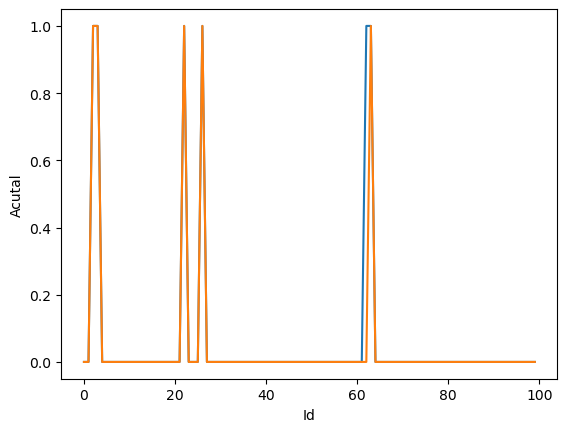

In [ ]:
sns.lineplot(x='Id',y='Acutal',data=Results.head(100))
sns.lineplot(x='Id',y='Predicted',data=Results.head(100))
plt.plot()

# Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred_dt=classifier.predict(X_test)
y_pred_dt

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred_dt)

0.9973333333333333

In [ ]:
cm=confusion_matrix(y_test,y_pred_dt)
cm

array([[2899,    1],
       [   7,   93]], dtype=int64)

In [ ]:
Results= pd.DataFrame(columns=['Acutal','Predicted'])
Results['Acutal']=y_test
Results['Predicted']=y_pred_dt
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(15)

,index,Acutal,Predicted,Id
0,5821,0,0,0
1,2516,0,0,1
2,4282,1,1,2
3,4173,1,1,3
4,255,0,0,4
5,4473,0,0,5
6,9430,0,0,6
7,8613,0,0,7
8,2189,0,0,8
9,3506,0,0,9


[]

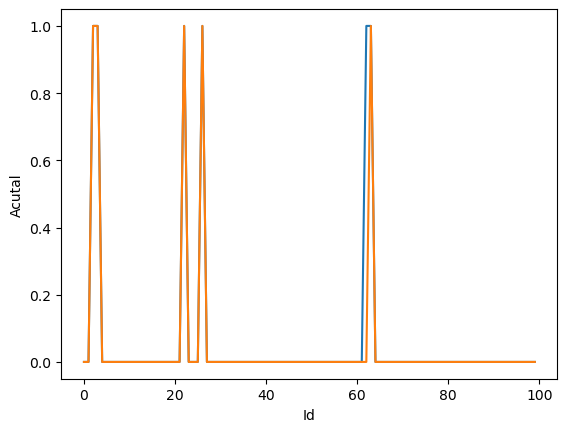

In [ ]:
sns.lineplot(x='Id',y='Acutal',data=Results.head(100))
sns.lineplot(x='Id',y='Predicted',data=Results.head(100))
plt.plot()

# Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf=rf.predict(X_test)
y_pred_rf

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,y_pred_rf)
accuracy_score(y_test,y_pred_rf)

0.9976666666666667

In [ ]:
cm=confusion_matrix(y_test,y_pred_rf)
cm

array([[2900,    0],
       [   7,   93]], dtype=int64)

In [ ]:
Results= pd.DataFrame(columns=['Acutal','Predicted'])
Results['Acutal']=y_test
Results['Predicted']=y_pred_rf
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(15)

,index,Acutal,Predicted,Id
0,5821,0,0,0
1,2516,0,0,1
2,4282,1,1,2
3,4173,1,1,3
4,255,0,0,4
5,4473,0,0,5
6,9430,0,0,6
7,8613,0,0,7
8,2189,0,0,8
9,3506,0,0,9


[]

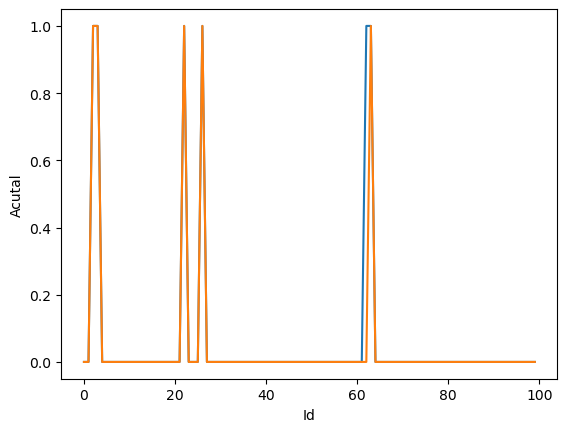

In [ ]:
sns.lineplot(x='Id',y='Acutal',data=Results.head(100))
sns.lineplot(x='Id',y='Predicted',data=Results.head(100))
plt.plot()

# KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn=classifier.predict(X_test)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,y_pred_knn)
accuracy_score(y_test,y_pred_knn)

0.9693333333333334

In [ ]:
cm=confusion_matrix(y_test,y_pred_knn)
cm

array([[2894,    6],
       [  86,   14]], dtype=int64)

In [ ]:
Results= pd.DataFrame(columns=['Acutal','Predicted'])
Results['Acutal']=y_test
Results['Predicted']=y_pred_knn
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(15)

,index,Acutal,Predicted,Id
0,5821,0,0,0
1,2516,0,0,1
2,4282,1,0,2
3,4173,1,0,3
4,255,0,0,4
5,4473,0,0,5
6,9430,0,0,6
7,8613,0,0,7
8,2189,0,0,8
9,3506,0,0,9


[]

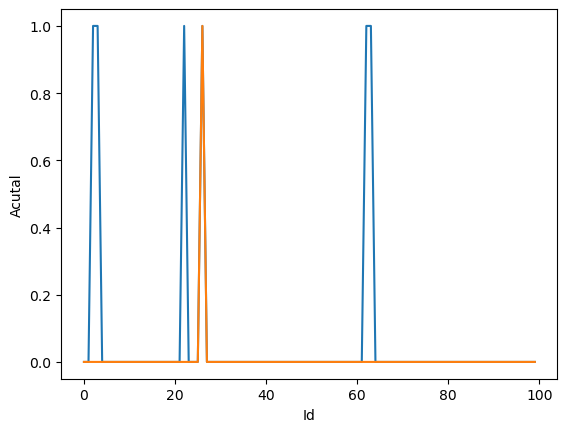

In [ ]:
sns.lineplot(x='Id',y='Acutal',data=Results.head(100))
sns.lineplot(x='Id',y='Predicted',data=Results.head(100))
plt.plot()

In [ ]:
import joblib


In [ ]:
joblib.dump(reg,"vinay_model.joblib")

['vinay_model.joblib']

Accuracy Table

In [ ]:
table = {'Test Size':['0.20','0.25','0.30','0.35'],
        'Logistic Regression':['99%','99%','99%','99%'],
        'Decision Tree Classifier':['99%','99%','99%','99%'],
        'Random Forest':['99%','99%','99%','99%'],
        'K-NN algo':['96%','97%','96%','96%']}
acc_table =pd.DataFrame(table)
print(acc_table)

  Test Size Logistic Regression Decision Tree Classifier Random Forest  \
0      0.20                 99%                      99%           99%   
1      0.25                 99%                      99%           99%   
2      0.30                 99%                      99%           99%   
3      0.35                 99%                      99%           99%   

  K-NN algo  
0       96%  
1       97%  
2       96%  
3       96%  
